In [1]:
%matplotlib inline
import os

import numpy as np
import xarray as xr

import utils

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs
import cmocean

%load_ext watermark
%watermark -a "Mike Levy" -d -iv -m -g -h

/glade/work/mclong/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/pooch/core.py:185: UserWarning: Cannot write to data cache '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.
  warn(message)


cmocean 2.0
numpy   1.18.1
cartopy 0.17.0
xarray  0.15.0
Mike Levy 2020-03-06 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper21
Git hash   : 247779276fd62448308e956d7080e64a07f6c453


In [11]:
nutrients = ['NO3', 'PO4', 'SiO3']

In [2]:
ds_surf_plot = xr.open_zarr('data/nutrients-surface-maps.zarr')
ds_surf_plot

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    NO3       (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    NO3_obs   (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    PO4       (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    PO4_obs   (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    SiO3      (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    SiO3_obs  (nlat, nlon) float32 dask.array<chunksize=(192, 321), meta=np.ndarray>
    TLAT      (nlat, nlon) float64 dask.array<chunksize=(192, 161), meta=np.ndarray>
    TLONG     (nlat, nlon) float64 dask.array<chunksize=(192, 161), meta=np.ndarray>

In [96]:
ds_zonal_mean = xr.open_zarr('data/nutrients-zonal-section.zarr')  
for v in nutrients:
    ds_zonal_mean[f'{v}_bias'] = ds_zonal_mean[v] - ds_zonal_mean[f'{v}_obs']
ds_zonal_mean

<xarray.Dataset>
Dimensions:    (basins: 4, lat_t: 394, region: 4, z_t: 60)
Coordinates:
  * basins     (basins) object 'Global' 'Atlantic Ocean' ... 'Indian Ocean'
  * lat_t      (lat_t) float32 -79.22052 -78.68631 ... 89.370575 89.904816
  * region     (region) <U14 'Global' 'Atlantic Ocean' ... 'Indian Ocean'
  * z_t        (z_t) float64 5.0 15.0 25.0 ... 4.875e+03 5.125e+03 5.375e+03
    z_t_       (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
Data variables:
    NO3        (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    NO3_obs    (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    PO4        (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    PO4_obs    (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    SiO3       (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    SiO3_obs   (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    NO3_bias   (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    PO4_bias   (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>
    SiO3_bias  (basins, z_t, lat_t) float32 dask.array<chunksize=(2, 60, 394), meta=np.ndarray>

In [4]:
glb_avg = xr.open_zarr('data/nutrients-global-profile.zarr')
glb_avg

<xarray.Dataset>
Dimensions:   (z_t: 60)
Coordinates:
  * z_t       (z_t) float64 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
Data variables:
    NO3       (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    NO3_obs   (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    PO4       (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    PO4_obs   (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    SiO3      (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>
    SiO3_obs  (z_t) float64 dask.array<chunksize=(60,), meta=np.ndarray>

In [8]:
levels = dict(
    NO3=[0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.5, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,],
    PO4=[0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38, 0.42, 0.46, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0001, 1.2, 1.4, 1.6, 1.8,],
    SiO3=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90,]
)


cmap_field = cmocean.cm.thermal

contour_spec = dict(
    NO3=dict(
        levels=levels['NO3'],
        extend='max',
        cmap=cmap_field,
        norm=colors.BoundaryNorm(levels['NO3'], ncolors=cmocean.cm.haline.N),
    ),
    NO3_bias=dict(
        levels=np.arange(-20, 21, 1),
        extend='both',        
        cmap=cmocean.cm.curl,
        norm=colors.DivergingNorm(vmin=-20, vcenter=0., vmax=20),        
    ),
    PO4=dict(
        levels=levels['PO4'],
        extend='max',
        cmap=cmap_field,
        norm=colors.BoundaryNorm(levels['PO4'], ncolors=cmocean.cm.haline.N),        
    ),
    PO4_bias=dict(
        levels=np.arange(-2, 2.1, 0.1),
        extend='both',
        cmap=cmocean.cm.curl,   
        norm=colors.DivergingNorm(vmin=-2, vcenter=0., vmax=2),                
    ),
    SiO3=dict(
        levels=levels['SiO3'],
        extend='max',
        cmap=cmap_field,
        norm=colors.BoundaryNorm(levels['SiO3'], ncolors=256),        
    ),
    SiO3_bias=dict(
        levels=np.arange(-50, 52, 2),
        extend='both',
        cmap=cmocean.cm.curl,   
        norm=colors.DivergingNorm(vmin=-50, vcenter=0., vmax=50),                
    ),    
    
)

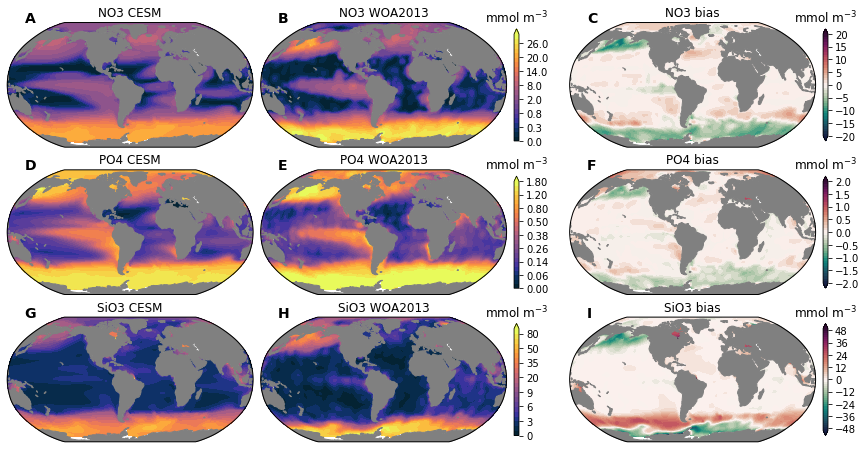

In [9]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=3, ncols=5, width_ratios=(1, 1, 0.02, 1, 0.02))

prj = ccrs.Robinson(central_longitude=305.0)

axs = []
maps = []
for i, nut in enumerate(['NO3', 'PO4', 'SiO3']):
    ax_m = plt.subplot(gs[i, 0], projection=prj)
    ax_o = plt.subplot(gs[i, 1], projection=prj)
    ax_b = plt.subplot(gs[i, 3], projection=prj)
    
    cax_field = plt.subplot(gs[i, 2])
    cax_bias = plt.subplot(gs[i, 4])
    
    axs.append((ax_m, ax_o, cax_field, ax_b, cax_bias))
    maps.extend([ax_m, ax_o, ax_b])
    
    cesm = ds_surf_plot[nut]
    obs = ds_surf_plot[f'{nut}_obs']
    bias = cesm - obs

    units = ds_surf_plot[nut].units
    
    
    cf_m = ax_m.contourf(
        ds_surf_plot.TLONG, ds_surf_plot.TLAT, cesm, 
        **contour_spec[nut],        
        transform=ccrs.PlateCarree(),
    )
    
    cf_o = ax_o.contourf(
        ds_surf_plot.TLONG, ds_surf_plot.TLAT, obs, 
        **contour_spec[nut],        
        transform=ccrs.PlateCarree(),        
    )
    
    cf_b = ax_b.contourf(
        ds_surf_plot.TLONG, ds_surf_plot.TLAT, bias, 
        **contour_spec[f'{nut}_bias'],                     
        transform=ccrs.PlateCarree(),        
    )    

    for ax in [ax_m, ax_o, ax_b]:
        land = ax.add_feature(
            cartopy.feature.NaturalEarthFeature(
                'physical','land','110m',
                edgecolor='face',
                facecolor='gray'
            )
        )        
        
    ax_m.set_title(f'{nut} CESM')
    ax_o.set_title(f'{nut} WOA2013')    
    ax_b.set_title(f'{nut} bias')        
    
    cb_field = plt.colorbar(cf_o, cax=cax_field)
    cb_field.ax.set_title(units)
    
    cb_bias = plt.colorbar(cf_b, cax=cax_bias)
    cb_bias.ax.set_title(units)
    
    
    
# add a gap between left two columns and right; scale colorbars
gs.update(left=0.05, right=0.95, hspace=0.05, wspace=0.05)
offset = 0.05
cax_vert_shrink = 0.8
for i in range(len(axs)):
    
    # the row of axis objects
    ax_m, ax_o, cax_field, ax_b, cax_bias = axs[i]
    
    # shift map
    p0 = ax_b.get_position()
    ax_b.set_position([p0.x0 + offset, p0.y0, p0.width, p0.height])

    # shift and scale colorbar
    p0 = cax_bias.get_position()
    shift_up = p0.height * (1. - cax_vert_shrink) / 2
    cax_bias.set_position([p0.x0 + offset, p0.y0 + shift_up, p0.width, p0.height * cax_vert_shrink])

    # scale colorbar    
    p0 = cax_field.get_position()
    shift_up = p0.height * (1. - cax_vert_shrink) / 2
    cax_field.set_position([p0.x0, p0.y0 + shift_up, p0.width, p0.height * cax_vert_shrink])

utils.label_plots(fig, maps, xoff=0.02, yoff=0)   

utils.savefig('nutrients-surface-maps.pdf')

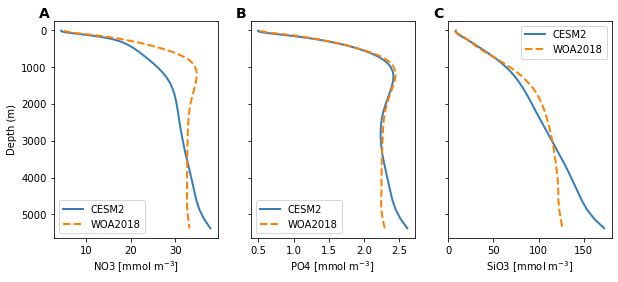

In [33]:
fig = plt.figure(figsize=(10, 4))

units = glb_avg.NO3.units

axs = []
for n, v in enumerate(nutrients):
    ax = fig.add_subplot(1, 3, n+1)
    axs.append(ax)
    
    ax.plot(glb_avg[v], glb_avg.z_t, '-', linewidth=2, color='#377eb8', label='CESM2')
    ax.plot(glb_avg[f'{v}_obs'], glb_avg.z_t, '--', linewidth=2, color='#ff7f00', label='WOA2018')

    ax.set(xlabel=f'{v} [{units}]')
    if n == 0:
        ax.set(ylabel='Depth (m)')
    else:
        ax.set_yticklabels([])
    plt.gca().invert_yaxis()
    ax.legend()
    
utils.label_plots(fig, axs, xoff=-0.02, yoff=0.01) 
utils.savefig('nutrients-global-profiles.pdf')

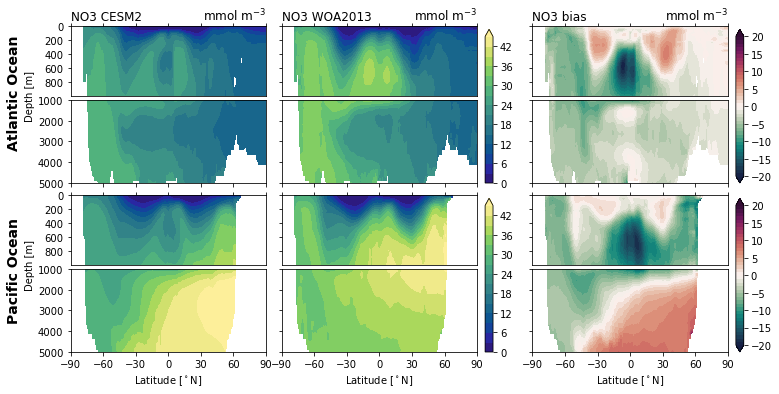

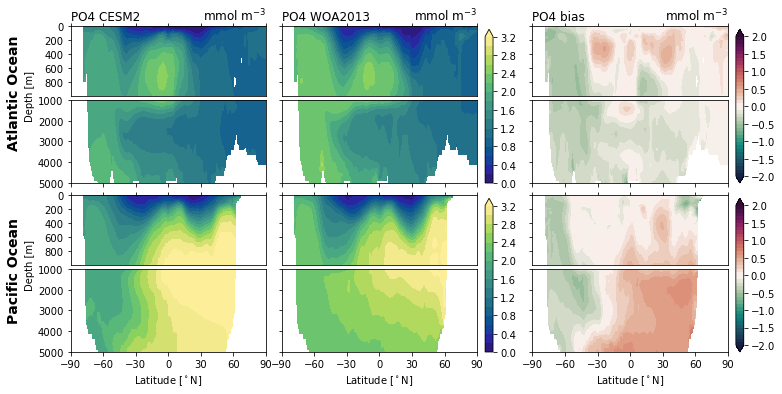

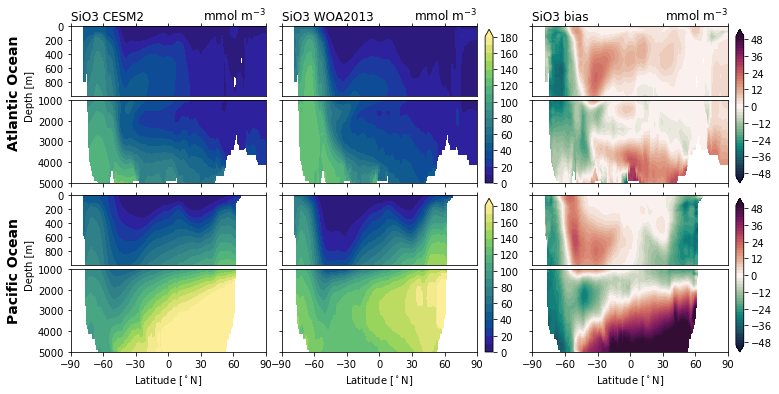

In [123]:
levels = dict(
    NO3=np.arange(0, 48, 3),
    PO4=np.arange(0, 3.4, 0.2),
    SiO3=np.arange(0, 190, 10),
)


cmap_field = cmocean.cm.haline

contour_spec = dict(
    NO3=dict(
        levels=levels['NO3'],
        extend='max',
        cmap=cmap_field,
    ),
    NO3_bias=dict(
        levels=np.arange(-20, 21, 1),
        extend='both',        
        cmap=cmocean.cm.curl,
        norm=colors.DivergingNorm(vmin=-20, vcenter=0., vmax=20),        
    ),
    PO4=dict(
        levels=levels['PO4'],
        extend='max',
        cmap=cmap_field,
    ),
    PO4_bias=dict(
        levels=np.arange(-2, 2.1, 0.1),
        extend='both',
        cmap=cmocean.cm.curl,   
        norm=colors.DivergingNorm(vmin=-2, vcenter=0., vmax=2),                
    ),
    SiO3=dict(
        levels=levels['SiO3'],
        extend='max',
        cmap=cmap_field,
    ),
    SiO3_bias=dict(
        levels=np.arange(-50, 52, 2),
        extend='both',
        cmap=cmocean.cm.curl,   
        norm=colors.DivergingNorm(vmin=-50, vcenter=0., vmax=50),                
    ),    
    
)
contour_spec.update({f'{v}_obs': contour_spec[v] for v in nutrients})

plot_basins = ['Atlantic Ocean', 'Pacific Ocean']

gss = []

col_name = ['CESM2', 'WOA2013', 'bias']
for nutrient in nutrients:    
    fig = plt.figure(figsize=(11, 6))
    gs = gridspec.GridSpec(2, 3)
    
    axs_surf = []
    axs_deep = []
    cfs_surf = []
    for row, basin in enumerate(plot_basins):
        
        axs_surf_row = []
        axs_deep_row = []
        cfs_surf_row = []
        for col, v in enumerate([nutrient, f'{nutrient}_obs', f'{nutrient}_bias']):
            gsi = gridspec.GridSpecFromSubplotSpec(100, 1, subplot_spec=gs[row, col])

            ax_surf = fig.add_subplot(gsi[:45, 0])
            ax_deep = fig.add_subplot(gsi[47:, 0])
            
            axs_surf_row.append(ax_surf)
            axs_deep_row.append(ax_deep)
            
            cf = ax_surf.contourf(
                ds_zonal_mean.lat_t, ds_zonal_mean.z_t, 
                ds_zonal_mean[v].sel(basins=basin),
                **contour_spec[v]
            )
            cfs_surf_row.append(cf)
            
            ax_deep.contourf(
                ds_zonal_mean.lat_t, ds_zonal_mean.z_t, 
                ds_zonal_mean[v].sel(basins=basin),
                **contour_spec[v]
            )
                             
            
            ax_surf.set_ylim([1000., 0.])
            ax_surf.set_yticks(np.arange(0, 1000, 200))
            ax_surf.set_xticklabels([])
            ax_surf.xaxis.set_ticks_position('top')
            ax_surf.set_xticks(np.arange(-90, 110, 30))
            
            ax_deep.set_ylim([5000., 1000.])
            ax_deep.xaxis.set_ticks_position('bottom')
            ax_deep.set_xticks(np.arange(-90, 110, 30))
            
            if col == 0:
                ax_deep.set_ylabel('Depth [m]')
                ax_deep.yaxis.set_label_coords(-0.18, 1.05)
            else:
                ax_surf.set_yticklabels('')
                ax_deep.set_yticklabels('')
                
            if row == 1:
                ax_deep.set_xlabel('Latitude [$^\circ$N]')
            else:
                ax_surf.set_title(f'{nutrient} {col_name[col]}', loc='left')
                ax_surf.set_title('mmol m$^{-3}$', loc='right')                            
                ax_deep.set_xticklabels('')


        axs_surf.append(axs_surf_row)
        axs_deep.append(axs_deep_row)
        cfs_surf.append(cfs_surf_row)
        
    gs.update(left=0.11, right=0.89, wspace=0.08,hspace=0.075)

    #-- shift the right two columns over to make room for colorbar
    offset = 0.05
    for i in range(2):
        for j in range(2, 3):
            p0 = axs_surf[i][j].get_position()
            axs_surf[i][j].set_position([p0.x0+offset,p0.y0,p0.width,p0.height])

            p0 = axs_deep[i][j].get_position()
            axs_deep[i][j].set_position([p0.x0+offset,p0.y0,p0.width,p0.height])


    #-- add colorbars
    for i in range(2):
        for j in [1, 2]:
            p0 = axs_surf[i][j].get_position()
            p1 = axs_deep[i][j].get_position()

            cbaxes = fig.add_axes([p1.x0 + p1.width + 0.01, 
                                   p1.y0 + 0.0, 
                                   0.01, 
                                   p0.height + p1.height - 0.0])
            cb = fig.colorbar(cfs_surf[i][j], cax=cbaxes)
    
    fig.text(0.03, 0.6, plot_basins[0],
             fontsize=14.,
             fontweight = 'semibold',rotation=90);

    fig.text(0.03, 0.2, plot_basins[1],
             fontsize=14.,
             fontweight = 'semibold',rotation=90);